In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

main_dir = '/Users/mathieuleverge/git/chain_lumen/'

In [2]:
from scipy.optimize import curve_fit

mu = 0.6105653703843762

In [3]:
1.1**2/mu

1.9817697804221275

======= CHAIN =======
Type         : hydroosmotic
Total length : 7.808519211028804
Current Time : 0
Screening lengths : 
        xi_s = 68.35439575032147
        xi_v = 68.35439575032147
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : None
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.000 with length 0.000 and 0.000 ions with pumping 0.000
Lumen 1 is at position 2.028 with length 1.028 and 1.730 ions with pumping 0.000
Lumen 2 is at position 5.615 with length 1.193 and 2.331 ions with pumping 0.000
Lumen -1 is at position 7.809 with length 0.000 and 0.000 ions with pumping 0.000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 1.0 with pumping 0.000
Bridge 1 : (1, 2) has length 1.3671 with pumping 0.000
Bridge 2 : (2, -1) has length 1.0 with pumping 0.000



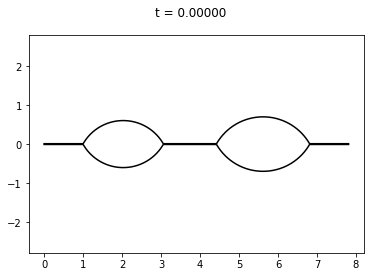

50.0 50.0


In [4]:
conf, ch = chain.load_config(os.path.join(main_dir, '_data/config.conf'))

#ca_b, delta = .01, .01

#ch.lumens_dict[1].ca = ca_b - delta
#ch.lumens_dict[2].ca = ca_b + delta
#ch.bridges_dict[1].ca = ca_b

show_chain = True
if show_chain :
    print(ch)
    x = np.linspace(0, ch.total_length, 1001)
    tools.plot_profile(x, ch, centers=0, lw=1.5, show=True)

max_step = int(conf['integration']['max_step'])
alpha = float(conf['integration']['alpha'])
tolerance = float(conf['integration']['tolerance'])
solver = conf['integration']['solver']
nb_frames = int(conf['sim']['nb_frames'])
recording = eval(conf['sim']['recording'])
savefig = eval(conf['sim']['savefig'])

theta = np.pi/3.
mu = np.sin(theta)**2 / (2*theta - np.sin(2*theta))

print(ch.xis/ch.bridges_dict[1].length, ch.xiv/ch.bridges_dict[1].length)

In [6]:
run = 1
#dirname = '2lumens/pumping_ca'+str(ca_b)+'_delta'+str(delta)+'/'

dir_name = os.path.join(main_dir, '_data/test')
try : 
    os.mkdir(dir_name)
    os.mkdir(os.path.join(dir_name, 'pics/'))
except :
    for elem in os.listdir(dir_name) :
        os.remove(os.path.join(dir_name, elem))
    pass

if run :
    chain.run(ch, max_step=max_step, alpha=alpha, recording=recording, tolerance=tolerance, nb_frames=nb_frames, solver=solver, savefig=savefig, state_simul=True, dir_name=dir_name, pics_dirname=os.path.join(dir_name, 'pics'))


Step :  100  ; Time :  1.677012  ; Nb Lumens :  2
Step :  200  ; Time :  7.827840  ; Nb Lumens :  2
Step :  300  ; Time :  14.122041  ; Nb Lumens :  2
Step :  400  ; Time :  20.298862  ; Nb Lumens :  2
Step :  500  ; Time :  26.424875  ; Nb Lumens :  2
Step :  600  ; Time :  32.486973  ; Nb Lumens :  2
Step :  700  ; Time :  38.449800  ; Nb Lumens :  2
Step :  800  ; Time :  44.378019  ; Nb Lumens :  2
Step :  900  ; Time :  50.249414  ; Nb Lumens :  2
Step :  1000  ; Time :  56.051737  ; Nb Lumens :  2
Step :  1100  ; Time :  61.818306  ; Nb Lumens :  2
Step :  1200  ; Time :  67.505323  ; Nb Lumens :  2
Step :  1300  ; Time :  73.175823  ; Nb Lumens :  2
Step :  1400  ; Time :  78.765956  ; Nb Lumens :  2
Step :  1500  ; Time :  84.319772  ; Nb Lumens :  2
Step :  1600  ; Time :  89.818805  ; Nb Lumens :  2
Step :  1700  ; Time :  95.306466  ; Nb Lumens :  2
Step :  1800  ; Time :  100.704674  ; Nb Lumens :  2
Step :  1900  ; Time :  106.098741  ; Nb Lumens :  2
Step :  2000  ; Time 

Step :  15600  ; Time :  812.859773  ; Nb Lumens :  2
Step :  15700  ; Time :  817.161371  ; Nb Lumens :  2
Step :  15800  ; Time :  821.354516  ; Nb Lumens :  2
Step :  15900  ; Time :  825.438858  ; Nb Lumens :  2
Step :  16000  ; Time :  829.414107  ; Nb Lumens :  2
Step :  16100  ; Time :  833.280032  ; Nb Lumens :  2
Step :  16200  ; Time :  837.036467  ; Nb Lumens :  2
Step :  16300  ; Time :  840.683307  ; Nb Lumens :  2


KeyboardInterrupt: 

In [7]:


folder = os.path.join(main_dir, '_data/out')
#folder = '_data/out'
#folder = '_data/N1000_0000/'

L, nions, pos = tools.load_file(os.path.join(folder, 'sim_all.dat'))
ell = tools.load_brfile(os.path.join(folder, 'sim_bridges.dat'))

Import successful !


Time 1.13682568205 : lumen 1 disappears



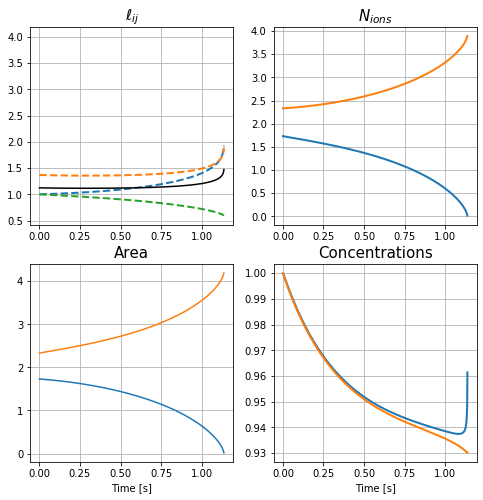

In [9]:
print(open(os.path.join(folder, 'events.log'), 'r').read())

tools.plot_evolution(L, nions, ell, savename=os.path.join(main_dir, '_data/out/2lumens_equilibrium.eps'), show_totalarea=False, savefig=0, x_logscale=0, figsize=(8, 8))



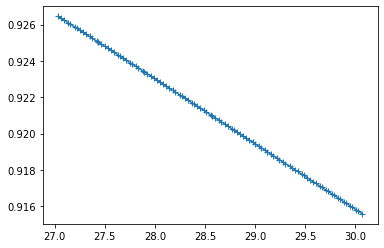

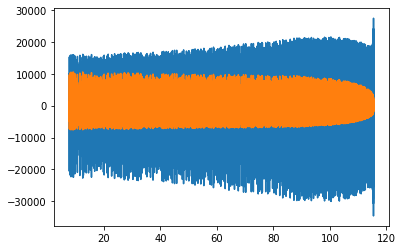

In [244]:
#plt.plot(L[:, 0], L[:, 1])
plt.plot(L[900:1000, 0], L[900:1000, 2], marker='+')

plt.show()

ddLddt_1 = (L[2:, 1] + L[:-2, 1] - 2*L[1:-1, 1])/((L[2:, 1]-L[1:-1, 1])*(L[1:-1, 1]-L[:-2, 1]))
ddLddt_2 = (L[2:, 2] + L[:-2, 2] - 2*L[1:-1, 2])/((L[2:, 2]-L[1:-1, 2])*(L[1:-1, 2]-L[:-2, 2]))
#ddLddt_2 = (L[1:, 2]-L[:-1, 2])/(L[1:, 2]+L[:-1, 2])**2

d = np.gradient(L[:, 1])
start=300
stop=-1

plt.plot(L[start+1:stop-1, 0], ddLddt_1[start:stop])
plt.plot(L[start+1:stop-1, 0], ddLddt_2[start:stop])


#plt.plot(L[1:, 0], dLdt_1)
#plt.plot(L[1:, 0], dLdt_2)
#plt.plot(L[1:, 0], dLdt_3)
#plt.plot(L, d)
#plt.plot(L[1:, 0], dLdt_4)
#plt.plot(L[:, 0], (L[:, 1]-L[:, 2])/(L[:, 1]+L[:, 2]))
#plt.plot(L[:, 0], ell[:, 1])
plt.show()

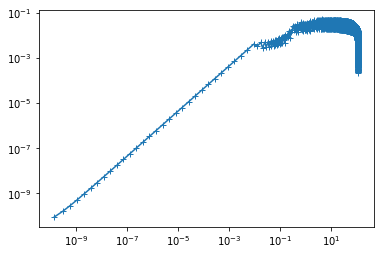

In [237]:
tstep = L[1:, 0] - L[:-1, 0]
plt.xscale('log')
plt.yscale('log')
plt.plot(L[1:, 0], tstep, marker='+')


In [773]:
1.1**2 / 0.6105653703843762

1.9817697804221275

In [73]:
def lin(x, a, b) :
    return a*x + b

def quad(x, a, b, c) :
    return a*x**2 + b*x +c


# Phase Diagram

# Pumping

## L1 = 2 ;  L2 = 1

alpha : 3.734852977806519
kappa : 0.0014418450669687892


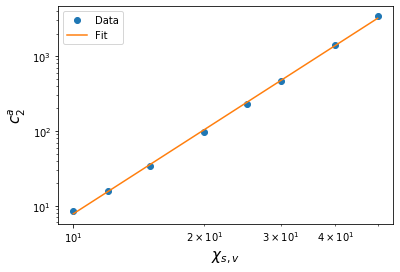

In [76]:
chi_0 = np.array([10., 12., 15., 20., 25., 30., 40., 50.])
ca2_0 = np.array([8.49475, 15.653, 34.2104, 98.1458, 228.287, 460.58, 1415.4, 3410.5])


x_log = np.log(chi_0)
y_log = np.log(ca2_0)
popt_lin_1, pcov_lin_1 = curve_fit(lin, x_log, y_log)
#popt_quad_1, pcov_quad_1 = curve_fit(quad, x_log, y_log)

print('alpha :', popt_lin_1[0])
print('kappa :', np.exp(popt_lin_1[1]))

plt.xscale('log')
plt.yscale('log')
plt.plot(chi_0, ca2_0, marker='o', label='Data', linewidth = 0)
plt.plot(chi_0, np.exp(popt_lin_1[1]) * chi_0**popt_lin_1[0], label = 'Fit')
#plt.plot(chi_0, np.exp(popt_lin_1[1]) * chi_0**popt_lin_1[0], label = 'Fit')
plt.legend()
plt.xlabel(r'$\chi_{s, v}$', fontsize=15)
plt.ylabel(r'$c_2^a$', fontsize=15)
plt.show()

## L1 = 1.1 ; L2 = 1

alpha : 3.0451695289319938
kappa : 0.00033697030975611206


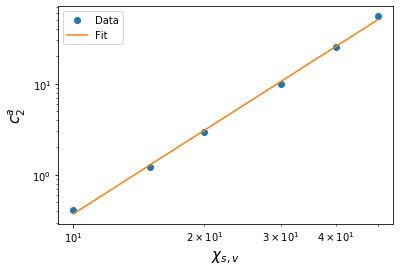

In [78]:
chi_1 = np.array([10., 15., 20., 30., 40., 50.])
ca2_1 = np.array([0.4077, 1.2237, 2.957, 9.8336, 25.23, 55.05])


x_log = np.log(chi_1)
y_log = np.log(ca2_1)
popt_lin_2, pcov_lin_2 = curve_fit(lin, x_log, y_log)

print('alpha :', popt_lin_2[0])
print('kappa :', np.exp(popt_lin_2[1]))

plt.xscale('log')
plt.yscale('log')
plt.plot(chi_1, ca2_1, marker='o', label='Data', linewidth = 0)
plt.plot(chi_1, np.exp(popt_lin_2[1]) * chi_1**popt_lin_2[0], label = 'Fit')
plt.legend()
plt.xlabel(r'$\chi_{s, v}$', fontsize=15)
plt.ylabel(r'$c_2^a$', fontsize=15)
plt.show()

In [72]:
np.exp(popt[1]) *40.**popt[0]

25.476273714466135

In [86]:

1.5**2 / mu

3.6851090958262698

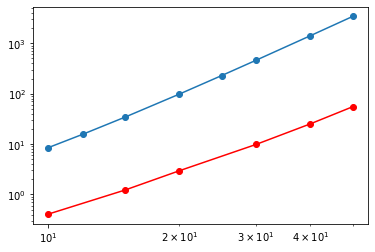

In [85]:
plt.xscale('log')
plt.yscale('log')
plt.plot(chi_0, ca2_0, marker='o', label='Data')
plt.plot(chi_1, ca2_1, marker='o', label='Data', color = 'r')

In [74]:
#folder = 'out0019/'#dirname
folder1 = '/Users/mathieuleverge/git/chain_lumen/_data/out_nopumping/'
folder2 = '/Users/mathieuleverge/git/chain_lumen/_data/out_pumping_normal/'
folder3 = '/Users/mathieuleverge/git/chain_lumen/_data/out_pumping_gradient/'
folder4 = '/Users/mathieuleverge/git/chain_lumen/_data/out_pumping_uniform/'

L1, nions1, pos1 = tl.load_file(os.path.join(folder1, 'sim_all.dat'))
L2, nions2, pos2 = tl.load_file(os.path.join(folder2, 'sim_all.dat'))
L3, nions3, pos3 = tl.load_file(os.path.join(folder3, 'sim_all.dat'))
L4, nions4, pos4 = tl.load_file(os.path.join(folder4, 'sim_all.dat'))


In [75]:
tl.plot_evolution(L1, nions1)
print()
tl.plot_evolution(L2, nions2)
print()
tl.plot_evolution(L3, nions3)
print()
tl.plot_evolution(L4, nions4)


TypeError: plot_evolution() missing 1 required positional argument: 'ell'

In [14]:
#fold10 = '_data/out0010/'
fold19 = '_data/out0019/'

#L0010, nions0010, pos0010 = tl.load_file(os.path.join(fold10, 'sim_all.dat'))
L0019, nions0019, pos0019 = tl.load_file(os.path.join(fold19, 'sim_all.dat'))


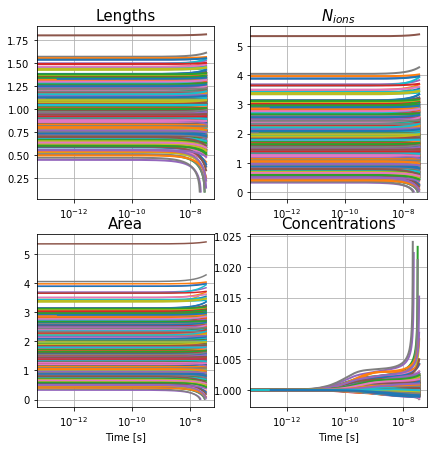

In [25]:

tl.plot_evolution(L0010, nions0010, x_logscale=1)


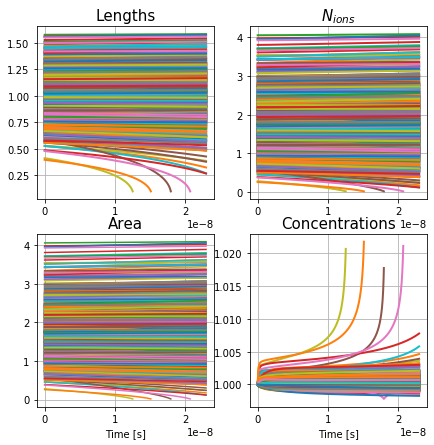

In [15]:

tl.plot_evolution(L0019, nions0019)


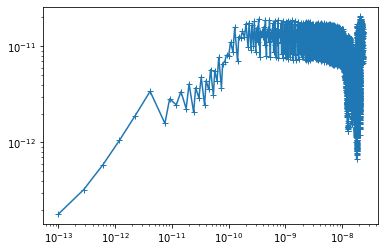

In [16]:
tstep = L0019[1:, 0] - L0019[:-1, 0]
plt.xscale('log')
plt.yscale('log')
plt.plot(L0019[1:-1, 0], tstep[1:], marker='+')


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


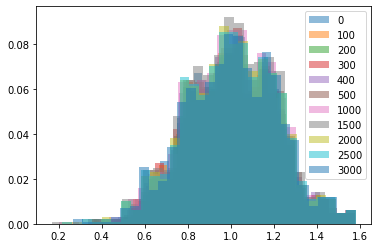

In [17]:
bins = 30
#bins=10
index_list = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000]#, 5000, 7000, 10000, ]#20000, 30000, 40000, 50000, 60000, 70000, 90000]

for i in index_list :
    N = len(L0019[i, 1:])-np.sum(np.isnan(L0019[i, 1:]))
    weights = np.ones_like(L0019[i, 1:])/float(N)
    plt.hist(L0019[i, 1:], weights=weights, alpha = 0.5, bins=bins, label = str(i))

plt.legend()

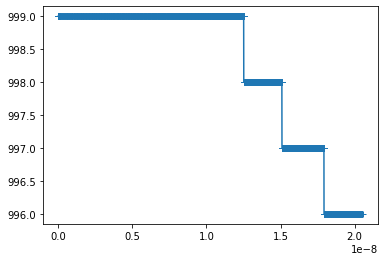

In [28]:
Nt = np.loadtxt(os.path.join(fold19, 'sim_nlum.dat'))
#plt.xscale('log')
#plt.yscale('log')
plt.plot(Nt[1:, 0], Nt[1:, 1], marker='+')
t = np.logspace(-6, -1)
a, k = -1/3.35, 1.75
#plt.plot(t, k*t**a)

In [7]:
ell

array([[0.00000000e+00, 1.18679287e+00, 1.00000000e+00,            nan],
       [5.00000000e-11, 1.18679287e+00, 1.00000000e+00,            nan],
       [1.40000000e-10, 1.18679287e+00, 1.00000000e+00,            nan],
       ...,
       [5.01745770e-02, 1.73613643e+00, 5.67259813e-01,            nan],
       [5.01747582e-02, 1.73654274e+00, 5.67232168e-01,            nan],
       [5.01750418e-02,            nan, 5.67232170e-01, 3.91852030e+00]])

In [8]:
L, nions, pos = tl.load_file('out/sim_all.dat')
ell = tl.load_brfile('out/sim_bridges.dat')

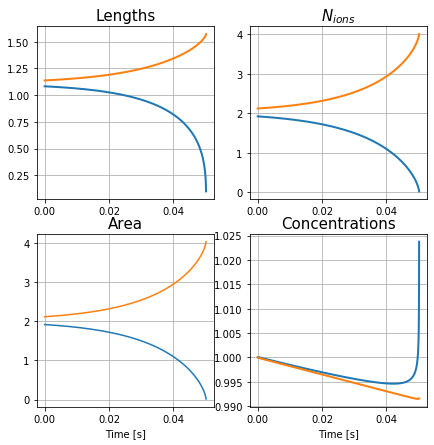

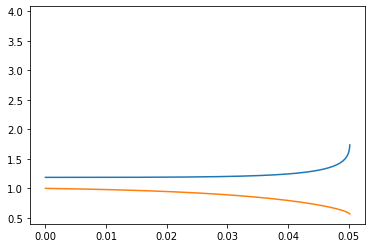

In [11]:
tl.plot_evolution(L, nions)

for b in range(1, len(ell[0])) :
    plt.plot(ell[:, 0], ell[:, b])

In [12]:
ell

array([[0.00000000e+00, 1.18679287e+00, 1.00000000e+00,            nan],
       [5.00000000e-11, 1.18679287e+00, 1.00000000e+00,            nan],
       [1.40000000e-10, 1.18679287e+00, 1.00000000e+00,            nan],
       ...,
       [5.01745770e-02, 1.73613643e+00, 5.67259813e-01,            nan],
       [5.01747582e-02, 1.73654274e+00, 5.67232168e-01,            nan],
       [5.01750418e-02,            nan, 5.67232170e-01, 3.91852030e+00]])

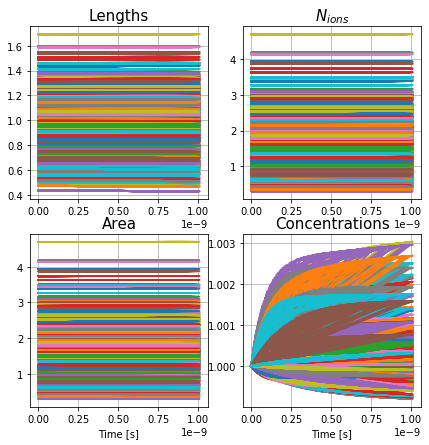

In [357]:
folder = 'N500_0010/'#dirname
#folder = 'out0000/'
L, nions, pos = tl.load_file(os.path.join(folder, 'sim_all.dat'))

fig, ax = plt.subplots(2, 2, figsize=(7, 7))

tmin, tmax = 0., 0.4

x_logscale = 0
if x_logscale :
    ax[0,0].set_xscale('log')
    ax[1,0].set_xscale('log')
    ax[0,1].set_xscale('log')
    ax[1,1].set_xscale('log')

y_logscale = 0
if y_logscale :
    ax[0,0].set_yscale('log')
    ax[1,0].set_yscale('log')
    ax[0,1].set_yscale('log')
    ax[1,1].set_yscale('log')

# LENGTHS
ax[0, 0].set_title('Lengths', fontsize=15)
for k in range(1, len(L[0])) :
    ax[0, 0].plot(L[:, 0], L[:, k], linewidth=2)
    
ax[0, 0].grid()
#ax[0, 0].set_xlabel('Time [s]')
#ax[0, 0].set_xlim(tmin, tmax)

#ax[0, 0].set_ylim(Lmin, Lmax)

# Nions
ax[0, 1].set_title(r'$N_{ions}$', fontsize=15)
for k in range(1, len(nions[0])) :
    ax[0, 1].plot(nions[:, 0], nions[:, k], linewidth=2)
    
ax[0, 1].grid()
#ax[0, 1].set_xlabel('Time [s]')
#ax[0, 1].set_xlim(tmin, tmax)

mu = 0.6105653703843762
# AREAS
ax[1, 0].set_title('Area', fontsize=15)
for k in range(1, len(L[0])) :
    ax[1, 0].plot(L[:, 0], L[:, k]**2 / mu)

t_a, A_tot = tl.calc_A_tot(L)
#ax[1, 0].plot(t_a, A_tot, linestyle='--', linewidth=2)

ax[1, 0].grid()
ax[1, 0].set_xlabel('Time [s]')
#ax[1, 0].set_xlim(tmin, tmax)


# Concentration
ax[1, 1].set_title('Concentrations', fontsize=15)
for k in range(1, len(nions[0])) :
    ax[1, 1].plot(nions[:, 0], nions[:, k]*mu / L[:, k]**2, linewidth=2)
    

ax[1, 1].grid()
ax[1, 1].set_xlabel('Time [s]')
#ax[1, 1].set_xlim(tmin, tmax)
#plt.savefig('graphs.eps', format='eps')
plt.show()

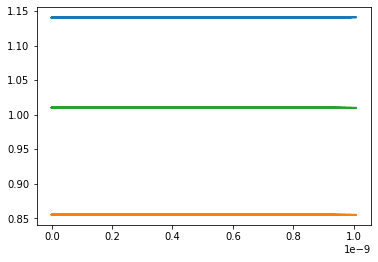

In [359]:
plt.plot(L[:, 0], L[:, 284], linewidth=2)
plt.plot(L[:, 0], L[:, 414], linewidth=2)
plt.plot(L[:, 0], L[:, 252], linewidth=2)


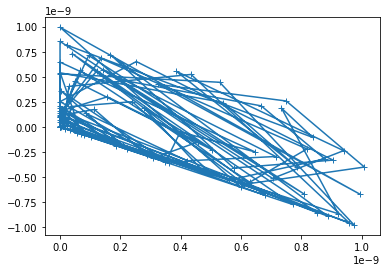

In [367]:
tstep = L[1:, 0] - L[:-1, 0]
#plt.yscale('log')
#plt.xscale('log')
plt.plot(L[1:-1, 0], tstep[1:], marker='+')

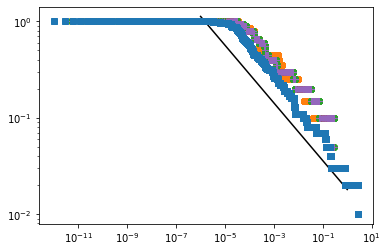

In [9]:
N = np.loadtxt('outN100/sim_nlum.dat')

N1 = np.loadtxt('_data/out1/sim_nlum.dat')
N2 = np.loadtxt('_data/out2/sim_nlum.dat')

N3 = np.loadtxt('_data/out3/sim_nlum.dat')
N4 = np.loadtxt('_data/out4/sim_nlum.dat')

#N5 = np.loadtxt('_data/out/sim_nlum.dat')

#N1 = np.loadtxt('_data/N100/chis50_chiv50/out1/sim_nlum.dat')
#N2 = np.loadtxt('_data/N100/chis50_chiv50/out2/sim_nlum.dat')

plt.xscale('log')
plt.yscale('log')
plt.plot(N[1:, 0], N[1:, 1]/N[0, 1], marker = 's', linewidth=0, zorder=20)
plt.plot(N1[1:, 0], N1[1:, 1]/N1[0, 1], marker = 'o', linewidth=0, zorder=3)
plt.plot(N2[1:, 0], N2[1:, 1]/N2[0, 1], marker = 'o', linewidth=0, zorder=3)

plt.plot(N3[1:, 0], N3[1:, 1]/N3[0, 1], marker = '+', linewidth=0, zorder=3)
plt.plot(N4[1:, 0], N4[1:, 1]/N4[0, 1], marker = '+', linewidth=0, zorder=3)

#plt.plot(N5[1:, 0], N5[1:, 1]/N5[0, 1], marker = '+', linewidth=0, zorder=3)

#plt.plot(N1[1:, 0], N1[1:, 1]/N1[0, 1], marker = 'o', linewidth=0, zorder=2)
#plt.plot(N2[1:, 0], N2[1:, 1]/N2[0, 1], marker = 'o', linewidth=0, zorder=1)

t = np.logspace(-6, 0)
#alpha, kappa = -2./5., 1.
alpha, kappa = -1./3.34, .018
plt.plot(t, kappa*t**alpha, color='k')

KeyboardInterrupt: 

Text(0, 0.5, 't')

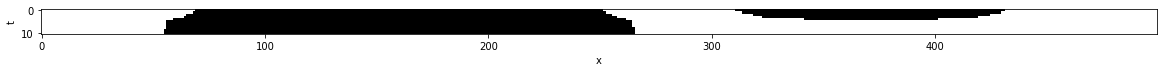

In [37]:

#plt.xticks(x[::int(npts/5)])
#plt.grid()wedn
#plt.axis('equal')

In [39]:
pos

array([[0.00000000e+00, 2.32486907e+00, 5.39324829e+00, ...,
        2.99284523e+02, 3.02295327e+02, 3.05554218e+02],
       [1.00000000e-12, 2.32486907e+00, 5.39324829e+00, ...,
        2.99284523e+02, 3.02295327e+02, 3.05554218e+02],
       [2.80000000e-12, 2.32486907e+00, 5.39324829e+00, ...,
        2.99284523e+02, 3.02295327e+02, 3.05554218e+02],
       ...,
       [7.08748868e-05, 2.32486907e+00,            nan, ...,
        2.99284523e+02,            nan, 3.05554218e+02],
       [7.08757002e-05, 2.32486907e+00,            nan, ...,
        2.99284523e+02,            nan, 3.05554218e+02],
       [7.08771642e-05, 2.32486907e+00,            nan, ...,
        2.99284523e+02,            nan, 3.05554218e+02]])

100.00384615384615